In [1]:
# Fascinating Pre-Read: https://technology.mlblogs.com/mlb-pitch-classification-64a1e32ee079

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Intitially deleted all columns from runner1_id to modified by (Empty/Useless information)
data = pd.read_csv('pitches.csv',low_memory = False)

In [4]:
data.pitch_type.unique() # All unqiue pitch types 

array([nan, 'FF', 'SL', 'CU', 'SI', 'FC', 'FT', 'KC', 'CH', 'IN', 'KN',
       'FS', 'FA', 'PO', 'FO', 'EP', 'UN', 'SC', 'AB'], dtype=object)

In [5]:
data.groupby('pitch_type').count()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,break_angle,type_confidence,zone,nasty,spin_dir,spin_rate,cc,on_1b,on_2b,on_3b
pitch_type,,,,,,,,,,,,,,,,,,,,,
AB,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
CH,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,...,72641,72641,72641,72641,72641,72641,2355,21495,14172,6657
CU,56379,56379,56379,56379,56379,56379,56379,56379,56379,56379,...,56379,56379,56379,56379,56379,56379,2095,15358,11411,6168
EP,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,5,16,14,4
FA,204,204,204,204,204,204,204,204,204,204,...,204,204,204,204,204,204,7,59,32,25
FC,41702,41702,41702,41702,41702,41702,41702,41702,41702,41702,...,41702,41702,41702,41702,41702,41702,1578,12746,8092,4018
FF,238541,238541,238541,238541,238541,238541,238541,238541,238541,238541,...,238541,238541,238541,238541,238541,238541,9709,70253,41943,21247
FO,329,329,329,329,329,329,329,329,329,329,...,329,329,329,329,329,329,10,88,85,51
FS,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,...,10503,10503,10503,10503,10503,10503,418,2904,2056,1024


In [6]:
data = data.dropna(subset = ['pitch_type']) # Drop all rows with nan values in pitch type 

In [7]:
data.pitch_type.unique() # Fastball, Slider, Curveball, Sinker, Cut Fastball, Two-Seam Fastball, Knuckle Curve, Changeup, IN?, Knuckleball, Splitter, Fourseam fastball, Pitchout, Forkball, Eephus, Un-identified, SC?, AB? 

array(['FF', 'SL', 'CU', 'SI', 'FC', 'FT', 'KC', 'CH', 'IN', 'KN', 'FS',
       'FA', 'PO', 'FO', 'EP', 'UN', 'SC', 'AB'], dtype=object)

In [8]:
# Check which other columns have NA values 
NA = data.isna().any()
NA.to_csv('NA.csv')

/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:

# NA Columns (info from pitch_by_pitch_metadata.csv) :
# event2 : secondary event outcome of at bat
# event3 : third event outcome of at bat
# event4 : fourth event outcome of at bat
# score : T = runs were score on this at bat
# pitch_tfs : pitch timestamp
# pitch_tfs_zulu : pitch timestamp
# cc: blank
# on_1b: player id of the runner on first base
# on_2b: player id of the runner on second base
# on_3b: player id of the runner on third base

# Based on my prior baseball knoweldge, all of these pitches are essentially irrelevant when predicting pitch type 

In [10]:
# drop all columns with NA values in them
data = data.drop(columns=['event2', 'event3','event4','score','pitch_tfs','pitch_tfs_zulu','cc','on_1b','on_2b','on_3b'])

In [11]:
# check if any other NA
NA = data.isna().any()
NA.to_csv('NA.csv')

/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Check for non-numeric columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716681 entries, 26 to 718960
Data columns (total 62 columns):
uid                716681 non-null int64
game_pk            716681 non-null int64
year               716681 non-null int64
date               716681 non-null object
team_id_b          716681 non-null int64
team_id_p          716681 non-null int64
inning             716681 non-null int64
top                716681 non-null int64
at_bat_num         716681 non-null int64
pcount_at_bat      716681 non-null int64
pcount_pitcher     716681 non-null int64
balls              716681 non-null int64
strikes            716681 non-null int64
fouls              716681 non-null int64
outs               716681 non-null int64
is_final_pitch     716681 non-null int64
final_balls        716681 non-null int64
final_strikes      716681 non-null int64
final_outs         716681 non-null int64
start_tfs          716681 non-null int64
start_tfs_zulu     716681 non-null object
batter_id          716681

In [13]:
# Date
# start_tfs_zulu
# stand
# b_height
# p_throws
# at_bat_des
# event
# pitch_des
# type 
# sv_id
# pitch_type (important!)

In [14]:
# can get rid of Data, start_tfs_zulu, b_height (not height, looks like birth date), at_bat_des, event, pitch_des, type, sv_id

data = data.drop(columns=['date',
                          'start_tfs_zulu',
                          'b_height',
                          'at_bat_des',
                          'event',
                          'pitch_des',
                          'type',
                          'sv_id'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716681 entries, 26 to 718960
Data columns (total 54 columns):
uid                716681 non-null int64
game_pk            716681 non-null int64
year               716681 non-null int64
team_id_b          716681 non-null int64
team_id_p          716681 non-null int64
inning             716681 non-null int64
top                716681 non-null int64
at_bat_num         716681 non-null int64
pcount_at_bat      716681 non-null int64
pcount_pitcher     716681 non-null int64
balls              716681 non-null int64
strikes            716681 non-null int64
fouls              716681 non-null int64
outs               716681 non-null int64
is_final_pitch     716681 non-null int64
final_balls        716681 non-null int64
final_strikes      716681 non-null int64
final_outs         716681 non-null int64
start_tfs          716681 non-null int64
batter_id          716681 non-null int64
stand              716681 non-null object
pitcher_id         716681 

In [17]:
non_standardized_data = data[data.pitch_type != 'IN']

In [18]:
non_standardized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712623 entries, 26 to 718960
Data columns (total 54 columns):
uid                712623 non-null int64
game_pk            712623 non-null int64
year               712623 non-null int64
team_id_b          712623 non-null int64
team_id_p          712623 non-null int64
inning             712623 non-null int64
top                712623 non-null int64
at_bat_num         712623 non-null int64
pcount_at_bat      712623 non-null int64
pcount_pitcher     712623 non-null int64
balls              712623 non-null int64
strikes            712623 non-null int64
fouls              712623 non-null int64
outs               712623 non-null int64
is_final_pitch     712623 non-null int64
final_balls        712623 non-null int64
final_strikes      712623 non-null int64
final_outs         712623 non-null int64
start_tfs          712623 non-null int64
batter_id          712623 non-null int64
stand              712623 non-null object
pitcher_id         712623 

In [14]:
# convert stand and p_throws into binary value (1-right, 0-left)
data.loc[(data.stand == 'R'), 'stand'] = 1

data.loc[(data.stand == 'L'), 'stand'] = 0

data.loc[(data.p_throws == 'R'), 'p_throws'] = 1

data.loc[(data.p_throws == 'L'), 'p_throws'] = 0

In [15]:
# convert pitch_type into nominal feature (1 column per pitch type with a binary signal, will help with correlation matrix that will follow)
#['FF', 'SL', 'CU', 'SI', 'FC', 'FT', 'KC', 'CH', 'IN', 'KN', 'FS',
#       'FA', 'PO', 'FO', 'EP', 'UN', 'SC', 'AB']

# One Hot Encoding

# Fastballs:
data['Fastball'] = np.where(data['pitch_type']=='FA', 1, 0) # FA
data['Four Fastball'] = np.where(data['pitch_type']=='FF', 1, 0) # FF
data['Two-Seam Fastball'] = np.where(data['pitch_type']=='FT', 1, 0) # FT
data['Cut Fastball'] = np.where(data['pitch_type']=='FC', 1, 0) # FC
data['Sinker'] = np.where(data['pitch_type']=='SI', 1, 0) # SI


# Breaking: 
data['Slider'] = np.where(data['pitch_type']=='SL', 1, 0) # SL
data['Curveball'] = np.where(data['pitch_type']=='CU', 1, 0) # CU
data['Knuckle Curve'] = np.where(data['pitch_type']=='KC', 1, 0) # KC
data['Forkball'] = np.where(data['pitch_type']=='FO', 1, 0) # FO
data['Eephus'] = np.where(data['pitch_type']=='EP', 1, 0) # EP

# Offspeed:
data['Splitter'] = np.where(data['pitch_type']=='FS', 1, 0) # FS
data['Changeup'] = np.where(data['pitch_type']=='CH', 1, 0) # CH

# Knuckleball:
data['Knuckleball'] = np.where(data['pitch_type']=='KN', 1, 0) # KN

# Pitchout
data['Pitchout'] = np.where(data['pitch_type']=='PO', 1, 0) # PO

# Unknown:
data['IN'] = np.where(data['pitch_type']=='IN', 1, 0) 
data['Unidentified'] = np.where(data['pitch_type']=='UN', 1, 0) # UN
data['SC'] = np.where(data['pitch_type']=='SC', 1, 0)
# data['AB'] = np.where(data['pitch_type']=='AB', 1, 0) only 2 rows so I dropped this pitch type

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716681 entries, 26 to 718960
Data columns (total 71 columns):
uid                  716681 non-null int64
game_pk              716681 non-null int64
year                 716681 non-null int64
team_id_b            716681 non-null int64
team_id_p            716681 non-null int64
inning               716681 non-null int64
top                  716681 non-null int64
at_bat_num           716681 non-null int64
pcount_at_bat        716681 non-null int64
pcount_pitcher       716681 non-null int64
balls                716681 non-null int64
strikes              716681 non-null int64
fouls                716681 non-null int64
outs                 716681 non-null int64
is_final_pitch       716681 non-null int64
final_balls          716681 non-null int64
final_strikes        716681 non-null int64
final_outs           716681 non-null int64
start_tfs            716681 non-null int64
batter_id            716681 non-null int64
stand                716681 

In [17]:
# save and temporarily remove pitch_type to maintain numeric data
pitch_types = data['pitch_type']
# assign new dataframe to maintain dataset with pitch_type
data_numeric = data.drop(columns=['pitch_type'])

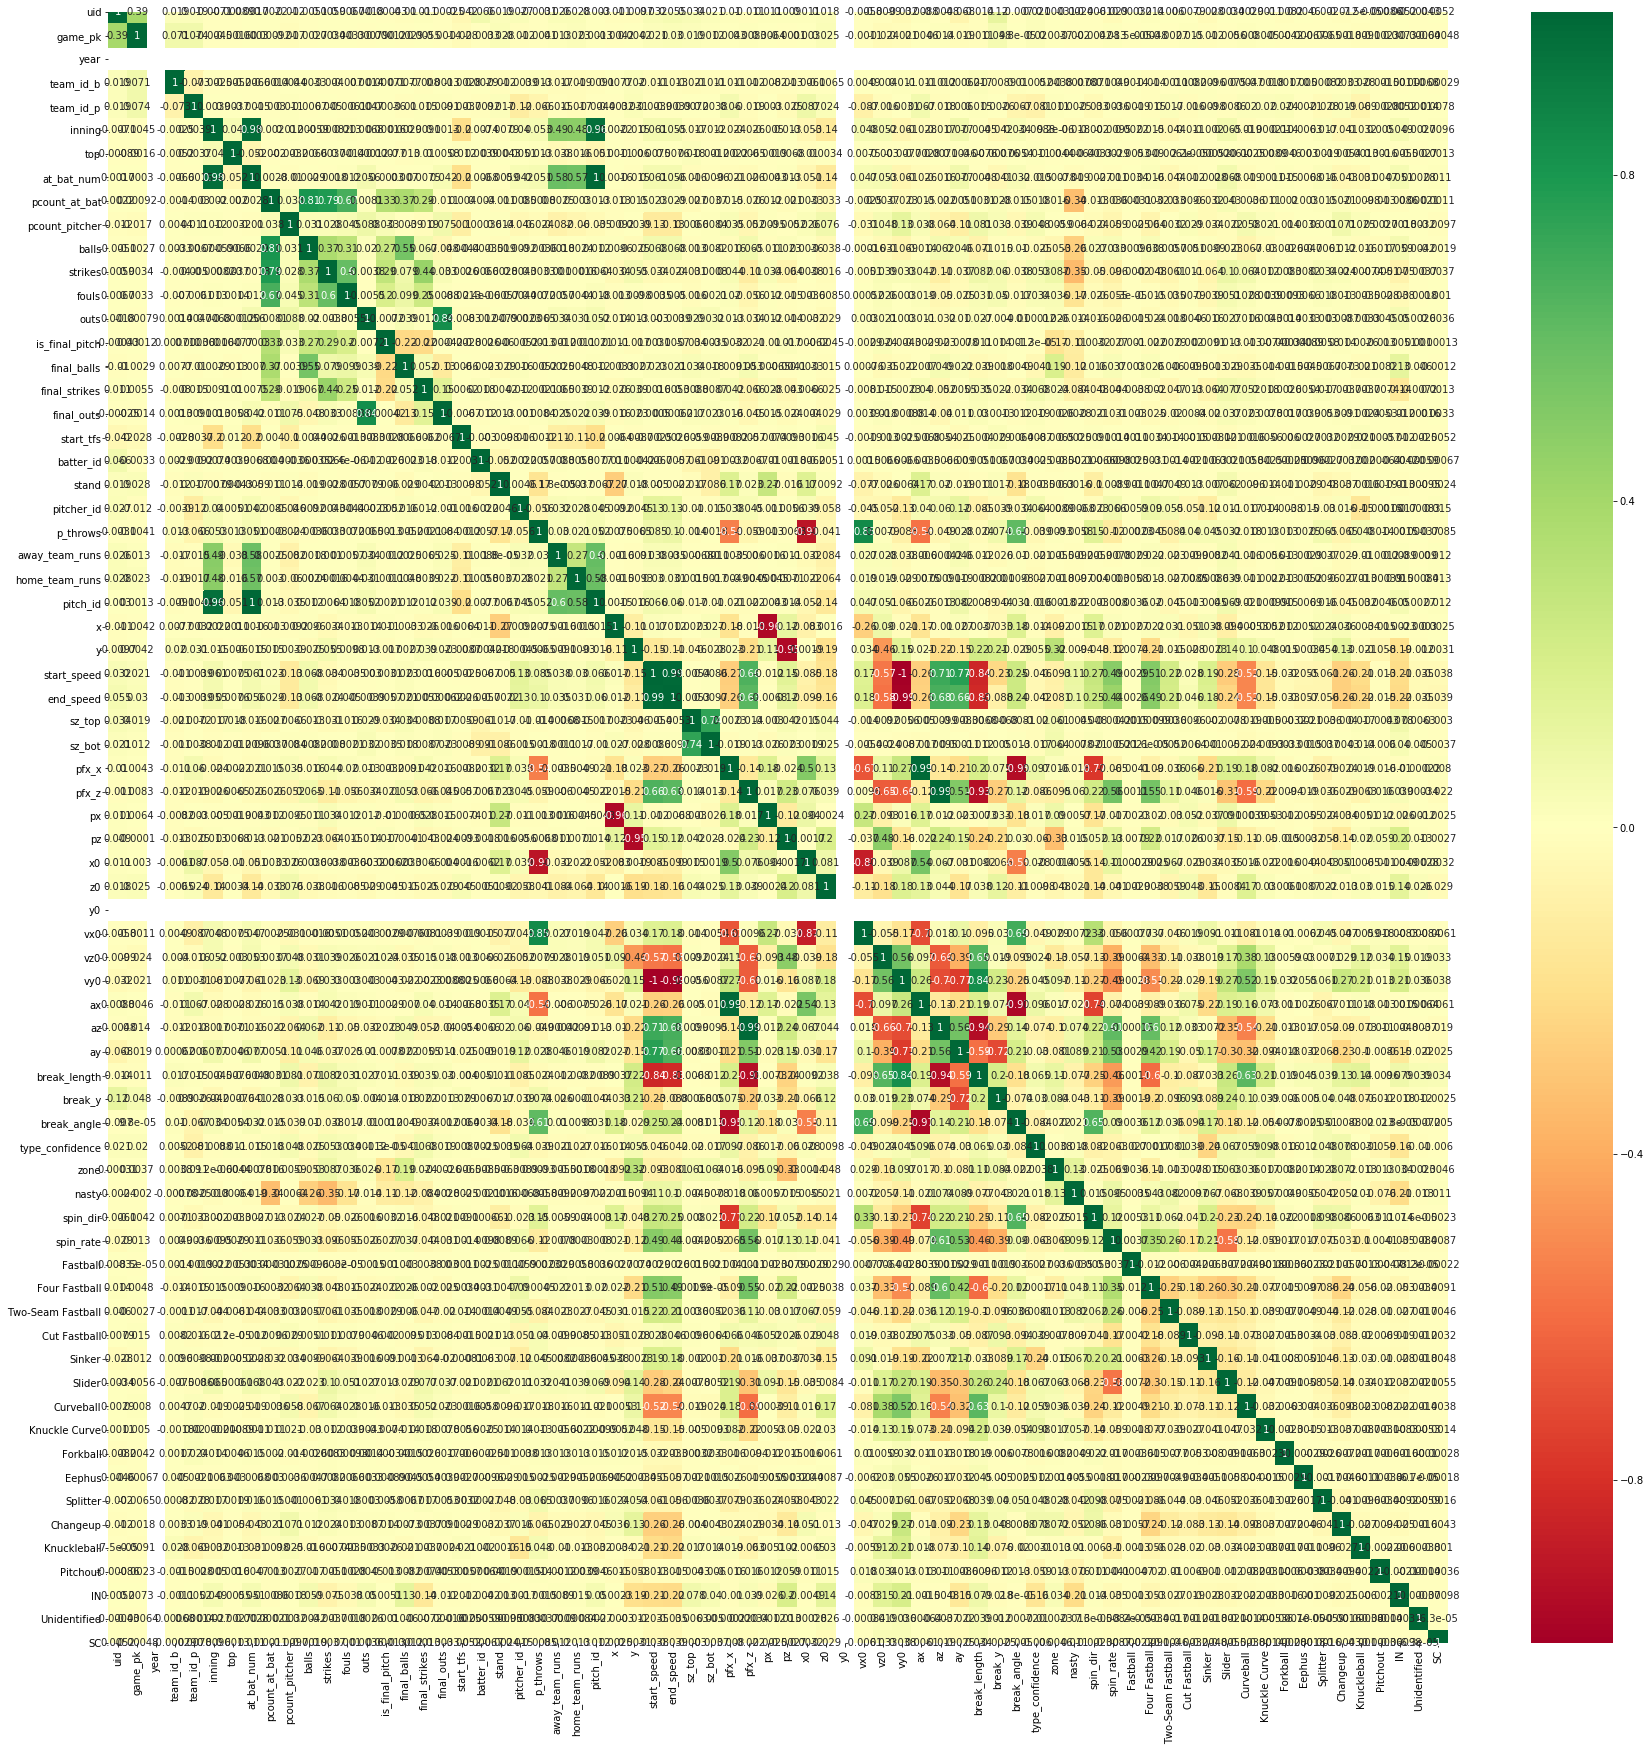

In [18]:
# Correlation Matrix!

corrmat = data_numeric.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,30))
g = sns.heatmap(data_numeric[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
(data_numeric[top_corr_features].corr()).to_csv('correlation.csv')

In [20]:
# Prominent Correlations with each pitch type

# Y, start_speed, end_speed, pfx_x (slider, sinker, curveball), pfx_z (fastball, slider, curveball), pz (FF, SL, CU, CH, IN), z0 (Sinker, Curveball,IN), vz0, vy0, ax, az, ay, break_length, break_y, break_angle, type_confidence (sinkers), zone (fastball), nasty (IN), spin_dir, spin_rate    

# Fastball: None
# Four Fastball: y (-0.213), start_speed (0.507), end_speed (0.486), pfx_z (0.547), pz (0.225), vz0 (-0.332), vy0(-0.507), az (0.601), ay (0.423), break_length (-0.601), break_y (-0.196), break_angle (0.115), zone (-0.107), spin_dir(0.109), spin_rate (0.354) 
# IN: final_balls (0.132), final_strikes (-0.141)

In [21]:
# Subset data to important features 

important_data = data[['y',
                      'start_speed',
                      'end_speed',
                      'pfx_x',
                      'pfx_z',
                      'pz',
                      'z0',
                      'vz0',
                      'vy0',
                      'ax',
                      'az',
                      'ay',
                      'break_length',
                      'break_y',
                      'break_angle',
                      'type_confidence',
                      'zone',
                      'nasty',
                      'spin_dir',
                      'spin_rate',
                      'pitch_type']]

In [22]:
important_data.to_csv('preprocessed.csv')

In [23]:
important_data.describe()

# Needs to be scaled because the ranges are very wide and variant from feature to feature 

,y,start_speed,end_speed,pfx_x,pfx_z,pz,z0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,type_confidence,zone,nasty,spin_dir,spin_rate
count,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000
mean,147.857376,87.362028,80.612666,-0.863183,4.767071,2.367194,5.932502,-4.202271,-127.875684,-1.818262,-23.389043,26.821424,6.755535,23.803143,4.086515,1.404510,9.703912,45.677389,180.497820,1701.832133
std,21.661838,6.153273,5.515286,6.322141,5.329747,0.919507,0.460120,3.100750,8.955758,10.613403,8.853820,4.521354,2.975481,0.072111,23.418248,0.660533,4.054243,16.709396,68.470294,661.070516
min,0.000000,39.900000,38.000000,-21.640000,-26.190000,-3.027000,2.158000,-18.657000,-150.573000,-34.903000,-70.144000,0.576000,0.200000,22.800000,-88.300000,0.000000,1.000000,0.000000,-0.002000,0.741000
25%,134.700000,83.500000,77.300000,-6.160000,1.850000,1.785000,5.682000,-6.312000,-134.650000,-10.572000,-29.205000,23.574000,4.500000,23.800000,-12.500000,0.901000,6.000000,34.000000,135.981000,1245.984000
50%,147.650000,88.800000,81.900000,-1.660000,5.810000,2.369000,5.950000,-4.407000,-129.960000,-2.734000,-22.252000,26.776000,6.200000,23.800000,5.600000,2.000000,11.000000,45.000000,194.447000,1801.323000
75%,161.470000,92.000000,84.700000,4.170000,8.710000,2.946000,6.222000,-2.314000,-122.253000,6.380000,-16.510000,29.979000,8.200000,23.800000,23.900000,2.000000,13.000000,57.000000,226.155000,2181.165000
max,213.270000,103.400000,95.900000,25.060000,23.470000,7.967000,9.411000,12.507000,-58.178000,46.219000,6.562000,86.197000,34.100000,24.300000,269.200000,2.000000,14.000000,100.000000,359.996000,5421.049000


In [24]:
# IMPORTANT FEATURES:

# y : vertical location of the pitch as it crossed home plate 
## start_speed: the pitch speed, in miles per hour
# end_speed: the pitch speed as it crossed the front of home plate.
# pfx_x: the horizontal movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.
# pfx_z: the vertical movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.
# pz: the height of pitch in feet as it crossed the front of home plate.
# z0: the height, in feet, of the pitch, measured at the initial point.
## vz0, vy0: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
# ax,ay,az: ax,az,ay: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
# break_length: the measurement of the greatest distance, in inches, between the trajectory of the pitch at any point between the release point and the front of home plate, and the straight line path from the release point and the front of home plate, 
# break_y: horzinal break? the value of the weight at the classification algorithm’s output node corresponding to the most probable pitch type, this value is multiplied by a factor of 1.5 if the pitch is known by MLBAM to be part of the pitcher’s repertoire.
# break_angle: the angle, in degrees, from vertical to the straight line path from the release point to where the pitch crossed the front of home plate, as seen from the catcher’s/umpire’s perspective.
# type_confidence: the value of the weight at the classification algorithm’s output node corresponding to the most probable pitch type, this value is multiplied by a factor of 1.5 if the pitch is known by MLBAM to be part of the pitcher’s repertoire.
# zone: a group identifier for the x,y coordinates of the pitch location into zones
# nasty: a metric attempting to quantify the difficulty of hitting this pitch. Not available for all years of the dataset
# spin_dir: a 360 degree representation of the direction of the spin on the pitch
# spin_rate: the revolutions per minute of the baseball

# remove redundant columns? (those with ##)

